# Outtake from tutorial 3 for logit

**This part fits the scope of tutorial 6 and supervised learning**

Next up, we would like to solve our toy classification problem using logistic regression. By 'solve' we mean that the logistic model should be able to distinguish data points of the two classes based on their attribute values. More formally, given a data point $ \boldsymbol x \in \mathbb{R}^2 $ with values $x_1$ and $x_2$, our logistic model should provide an estimate of the probability $p \left ( y| \boldsymbol x \right )$, with $ y \in \left \{ 0,1 \right \} $ denoting the binary class label. We discuss logistic regression in detail in Chapter 5 of the course. For now, you can simply consider it the counterpart to ordinary linear regression that you want to use whenever you face a classification problem. If you'd like to know more now, you can read the [wikipedia page on logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) or one of the many tutorials on the topic (e.g., [here](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)).  

With regard to Python, both statsmodels and scikit learn are good python packages to use for logistic regression. Start with using scikit learn. Make sure to set the penalty to 'none' such that no regularization is applied.

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', fit_intercept=True)
model.fit(data, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Having estimated the logit model, we want to evaluate our results. To that end, we first inspect the estimated model, i.e. the intercept term and the coefficients. You should be familiar with this step from your experiences with [linear regression](https://en.wikipedia.org/wiki/Linear_regression).

In [46]:
# Print intercept and coefficients of the estimated logit model
print('Intercept:')
print(model.intercept_)

print('Coefficients:')
print(model.coef_)

Intercept:
[-16.24606478]
Coefficients:
[[3.30425773 3.15027128]]


Speaking about linear regression, wasn't there are nice way to summarize the estimated model, depicting coefficient values, test statistics, p-values and the like? Shouldn't logistic regression give a similarly neat output? Yes, it should and it actually can, provided we use the statsmodels package instead of sklearn. In brief, scikit-learn is the 'go-to library' for machine learning in Python. We will use it a lot in the course. However, let's also play with statsmodels. 

Repeat the above task and estimate a logit model but this time using statsmodels.  Also produce a compelling summary table of your model including p-values and fitting statistics. Use a different variable name for the resulting model, for instance 'stat_model_logit', than you used above.

In [47]:
 # Code to run logistic regression and output resulting model using statsmodel library
import statsmodels.api as sm

stat_model_logit = sm.Logit(labels, data)
result = stat_model_logit.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.557562
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.196      
Dependent Variable: y                AIC:              2234.2468  
Date:               2020-11-03 19:29 BIC:              2245.4486  
No. Observations:   2000             Log-Likelihood:   -1115.1    
Df Model:           1                LL-Null:          -1386.3    
Df Residuals:       1998             LLR p-value:      5.8337e-120
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
----------------------------------------------------------------------
       Coef.      Std.Err.       z        P>|z|      [0.025     0.975]
----------------------------------------------------------------------
x1     0.2366       0.0382     6.1968     0.0000     0.1618     0.3115
x2     0.1645       0.0385     4.2709

Furthermore, we want to look at the classification accuracy of the model, that is the number of cases it classifies correctly. For simplicity, we will calculate classification accuracy **in-sample**.  This means that we use the same data set, which we used to before to estimate the model, to compute its accurcy. Note that this is typically a bad idea. We will discuss why in the course, but maybe you already have an answer? 

Calculating classification accuracy, i.e. the fraction of correctly classified cases, requires setting a probability treshold might. Let's consider a value of .5 for now. 

If the accuracy is wildly off, either you deliberately generated data that was hard to separate into classes or you did something wrong. Go back to data generation, alter the parameters of the normal distributions, and examine how accuracy varies with parameter adjustments. 

In [48]:
# Calculate the classification accuracy of the logit model in-sample using a classification cut-off of 0.5
# Using inbuild scikit-learn functionality, you can achive this with one line of code
print('Accuracy:')
model.score(data, labels)

Accuracy:


0.984

To get a better intuition for how the logistic regression works, we want to plot the decision boundary of the regression model given our datapoints. There are multiple options to do this, the simplest being drawing a line given the parameters of the model. Also adding our data, as we did before, this will produce a very nice graph of our classification problem and the classify we developed. Here is once again an [example](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/prodoc_ml_miniassign_1_demo_plot2.png). Your plot should look similar.

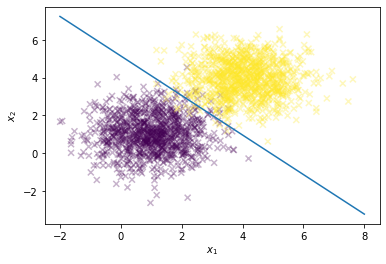

In [49]:
# Write code to create a two-dimensional plot of the data and how the logistic regression separates the two classes
w = model.coef_[0]
xx = np.linspace(-2,8)

a = -w[0] / w[1]
b = -model.intercept_[0] / w[1]

yy = a * xx + b

fig = plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3, marker='x')
plt.plot(xx,yy);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");